In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests as r

## Question 1

In [5]:
d= pd.read_csv('zomato.csv')
d=d[d['Country Code']==1]
data=d.copy()

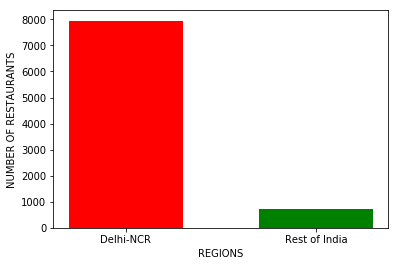

In [6]:
a=data.copy()
b=a[(a.City=='New Delhi')|(a.City=='Ghaziabad')|(a.City=='Noida')|(a.City=='Gurgaon')|(a.City=='Faridabad')]
y=b.City.count()
x=a.City.count()-y
plt.bar(['Delhi-NCR','Rest of India'],[y,x],width=0.6,color=['red','green'])
plt.xlabel('REGIONS')
plt.ylabel('number of restaurants'.upper())
plt.savefig('z1.png')



In [9]:
a=data.copy()
c=a[(a.City!='New Delhi')&(a.City!='Ghaziabad')&(a.City!='Noida')&(a.City!='Gurgaon')&(a.City!='Faridabad')]
cuis_d=b.Cuisines
cuis_r=c.Cuisines
dn=[]
dr=[]
for i in cuis_d:
    for j in i.split(','):
        dn.append(j.strip())
for i in cuis_r:
    for j in i.split(','):
        dr.append(j.strip())
print(set(dr)-set(dn))

{'German', 'Malwani', 'Cajun', 'BBQ'}


In [10]:
print(pd.Series(dr).value_counts().iloc[0:10])
print(pd.Series(dn).value_counts().iloc[0:10])


North Indian    349
Chinese         242
Continental     177
Italian         147
Cafe            136
Fast Food        97
South Indian     62
Mughlai          59
Desserts         55
Mexican          50
dtype: int64
North Indian    3597
Chinese         2448
Fast Food       1866
Mughlai          933
Bakery           697
South Indian     569
Continental      547
Desserts         542
Street Food      538
Italian          535
dtype: int64


In [11]:
lat=[[28.5355, 77.3910],[28.4595, 77.0266],[28.4089, 77.3178],[28.6692, 77.4538],[28.6139, 77.2090]] 
for i in range(5):
    res=r.get('https://developers.zomato.com/api/v2.1/cuisines?lat='+str(lat[i][0])+'&lon='+str(lat[i][1]),headers={'user-key':'ed07245ad8d4cc89011d3e35eae1ea33'})
    data=res.json()
    o_d=[]
    for i in data['cuisines']:
        o_d.append(i['cuisine']['cuisine_name'])

In [12]:
print(set(dr)-set(o_d))
#this is for the dataset error 
#i have fetched this using api

{'German', 'Charcoal Grill', 'Cajun', 'Indian'}


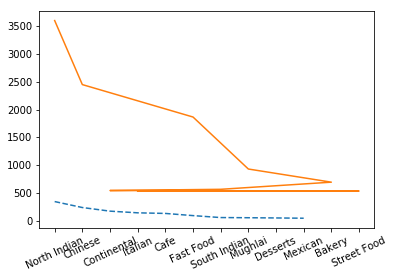

In [20]:
plt.plot(pd.Series(dr).value_counts().iloc[0:10].index,pd.Series(dr).value_counts().iloc[0:10],'--')
plt.plot(pd.Series(dn).value_counts().iloc[0:10].index,pd.Series(dn).value_counts().iloc[0:10],'-')
plt.xticks(rotation=25)
plt.savefig('r.png')

## Question 2

In [22]:
data=d.copy()
rating=data['Aggregate rating']
votes=data.Votes

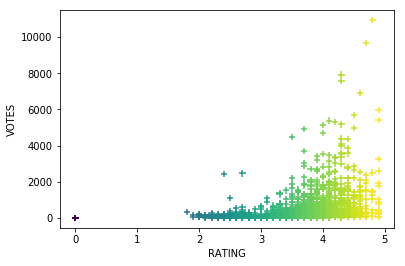

In [23]:
plt.scatter(rating,votes,c=rating,marker='+',s=40)
plt.xlabel('RATING')
plt.ylabel('VOTES')
plt.savefig('z2.png')

In [24]:
numcus=data.Cuisines
def f(n):
    n=str(n)
    n=len(n.split(','))
    return n 
numcus=numcus.apply(f)

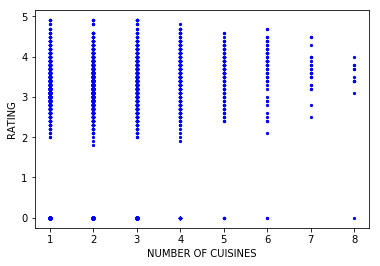

In [26]:
plt.scatter(numcus,rating,color='blue',marker='.',s=20)
plt.ylabel('RATING')
plt.xlabel('NUMBER OF CUISINES')
plt.savefig('z3.png')


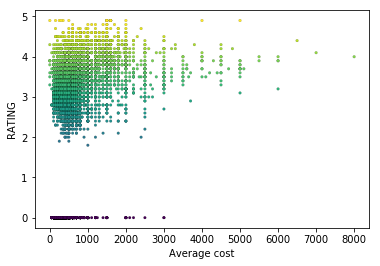

In [20]:
i=0
def g(n):
    global i
    if data['Country Code'].iloc[i]==14:
        n=n*47.08
    elif data['Country Code'].iloc[ i]==30:
        n=n*16.14
    elif data['Country Code'].iloc[ i]==37:
        n=n*53.80
    elif data['Country Code'].iloc[ i]==94:
        n=n*0.0052
    elif data['Country Code'].iloc[ i]==148:
        n=n*45.11
    elif data['Country Code'].iloc[ i]==162:
        n=n*1.42
    elif data['Country Code'].iloc[ i]==166:
        n=n*19.82
    elif data['Country Code'].iloc[ i]==184:
        n=n*51.80
    elif data['Country Code'].iloc[ i]==189:
        n=n*4.61
    elif data['Country Code'].iloc[ i]==191:
        n=n*0.40
    elif data['Country Code'].iloc[ i]==208:
        n=n*11.56
    elif data['Country Code'].iloc[ i]==214:
        n=n*19.65
    elif data['Country Code'].iloc[ i]==215:
        n=n*92.54
    elif data['Country Code'].iloc[ i]==216:
        n=n*72.17
    else:
        n=n
    i= i+1
    return n
ac=data['Average Cost for two'].apply(g)
plt.scatter(ac,rating,c=rating,marker='.',s=30,edgecolor='black',linewidth=0.1)
plt.ylabel('RATING')
plt.xlabel('Average cost')
plt.savefig('z4.png')

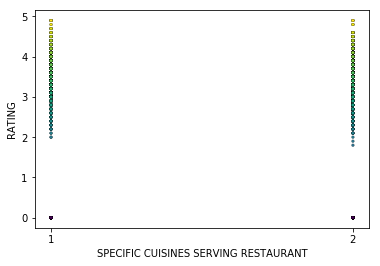

In [21]:
bool=numcus<=2
sp=numcus[bool]
spr=rating[bool]
plt.scatter(sp,spr,c=spr,marker='.',s=30,linewidth=0.2,edgecolor='black')
plt.ylabel('RATING')
plt.xticks([1,2])
plt.xlabel('SPECIFIC CUISINES SERVING RESTAURANT')
plt.savefig('z5')


In [22]:
data.columns
data=d.copy()
data['wr']=data['Votes']*data['Aggregate rating']
data=data.groupby('Locality').sum()
data.wr=data.wr/data.Votes
data.dropna(subset=['wr'],inplace=True)
data.sort_values('wr').loc[:,'wr'].iloc[-10:]


Locality
Riverside Mall, Gomti Nagar         4.700000
Sector 5, Salt Lake                 4.707023
Banjara Hills                       4.718762
Deccan Gymkhana                     4.800000
Express Avenue Mall,  Royapettah    4.800000
Kirlampudi Layout                   4.820161
Powai                               4.841869
Friends Colony                      4.886916
Hotel Clarks Amer, Malviya Nagar    4.900000
Aminabad                            4.900000
Name: wr, dtype: float64

## Question 3

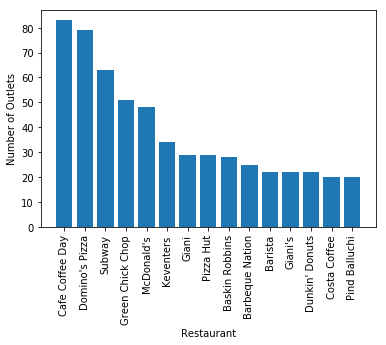

In [36]:
data=d.copy()
data['Restaurant Name'].value_counts()[:15]
plt.bar(data['Restaurant Name'].value_counts()[:15].index,data['Restaurant Name'].value_counts()[:15])
plt.xticks(rotation=90)
plt.xlabel('Restaurant')
plt.ylabel('Number of Outlets')
plt.savefig('p1')

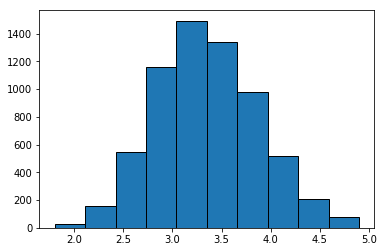

In [37]:
data=d.copy()
data=data[data['Aggregate rating']!=0]
y=data['Aggregate rating']
plt.hist(y,edgecolor='black')
plt.savefig('p2')

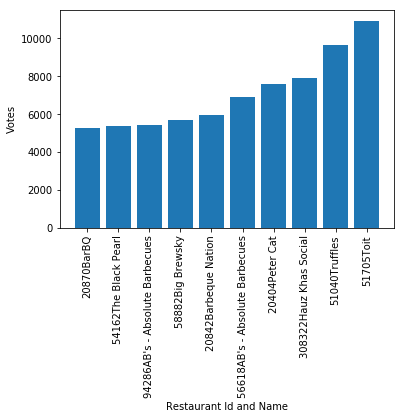

In [47]:
data=d.copy()
data.sort_values('Votes',inplace=True)
a,b=data['Restaurant ID'].iloc[-10:],data.Votes.iloc[-10:]
plt.bar(np.array(a,dtype=str)+ np.array(data['Restaurant Name'].iloc[-10:]),b)
plt.xticks(rotation=90)
plt.xlabel('Restaurant Id and Name')
plt.ylabel('Votes')
plt.savefig('p3.png')

American     112
Seafood       59
Sandwich      49
Pizza         49
Burger        49
Steak         42
Italian       38
Breakfast     37
Mexican       36
Sushi         34
dtype: int64

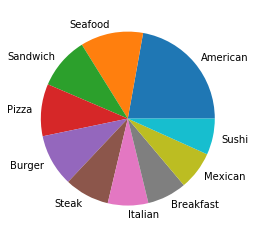

In [11]:
data=d.copy()
data=data[data['Country Code']==216]
data.dropna(subset=['Cuisines'],inplace=True)
uc=data.Cuisines
cu=[]
for i in uc:
    for j in i.split(','):
        cu.append(j.strip())
cu=pd.Series(cu)
plt.pie(cu.value_counts().iloc[:10],labels=cu.value_counts().index[:10])
plt.savefig('p4.png')
cu.value_counts().iloc[:10]


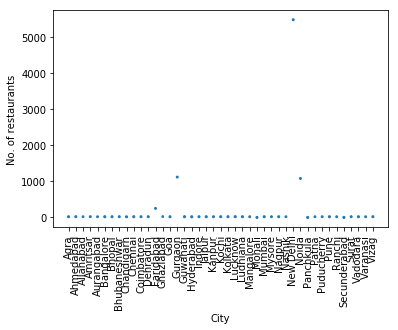

In [39]:
data=d.copy()
data['wr']=data.Votes*data['Aggregate rating']
no=data.groupby('City').count().Address
nd=data.groupby('City').sum()
nd['wr']=nd.wr/nd.Votes
nd=nd.wr
plt.scatter(nd.index,no,s=nd)
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('No. of restaurants')
plt.savefig('p5.png')

